In [ ]:
  import numpy as np
  import pandas as pd
  import csv
  import matplotlib.pyplot as plt
  from scipy.spatial import distance_matrix
  from scipy.stats import skew
  import pylab as p

In [ ]:
movieDataSet=pd.read_csv("/content/drive/MyDrive/movie_metadata.csv")
credit_DataFrame=pd.read_csv("/content/drive/MyDrive/tmdb_5000_credits.csv")
movies_DataFrame=pd.read_csv("/content/drive/MyDrive/tmdb_5000_movies.csv")

data = list(csv.reader(open("/content/drive/MyDrive/movie_metadata.csv")))
data = np.array(data)
print(data[:,3])

['duration' '178' '169' ... '76' '100' '90']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movieDataSet.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movieDataSet["duration"][0]

178.0

In [ ]:
movieDataSet.duration
type(movieDataSet)

pandas.core.frame.DataFrame

# **Correlation**

In [ ]:
# movie_metadata
# Threshold for removing correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = movieDataSet.corr().abs()
corr_matrix

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,0.135038,0.131673,0.261662,0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,0.041268,0.221890,0.021090,0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,0.017885,0.209786
facenumber_in_poster,0.033897,0.013469,0.041268,0.099368,0.072257,0.027755,0.026998,0.091475,1.000000,0.069018,0.019559,0.061504,0.071228,0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,0.069018,1.000000,0.084292,0.003147,0.219496,0.292475,0.024719,0.400594


In [ ]:
corr_matrix_credit = credit_DataFrame.corr().abs()
corr_matrix_credit

,movie_id
movie_id,1.0


In [ ]:
corr_matrix_movies = movies_DataFrame.corr().abs()
corr_matrix_movies

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.089377,1.000000,0.031202,0.050425,0.153536,0.270595,0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


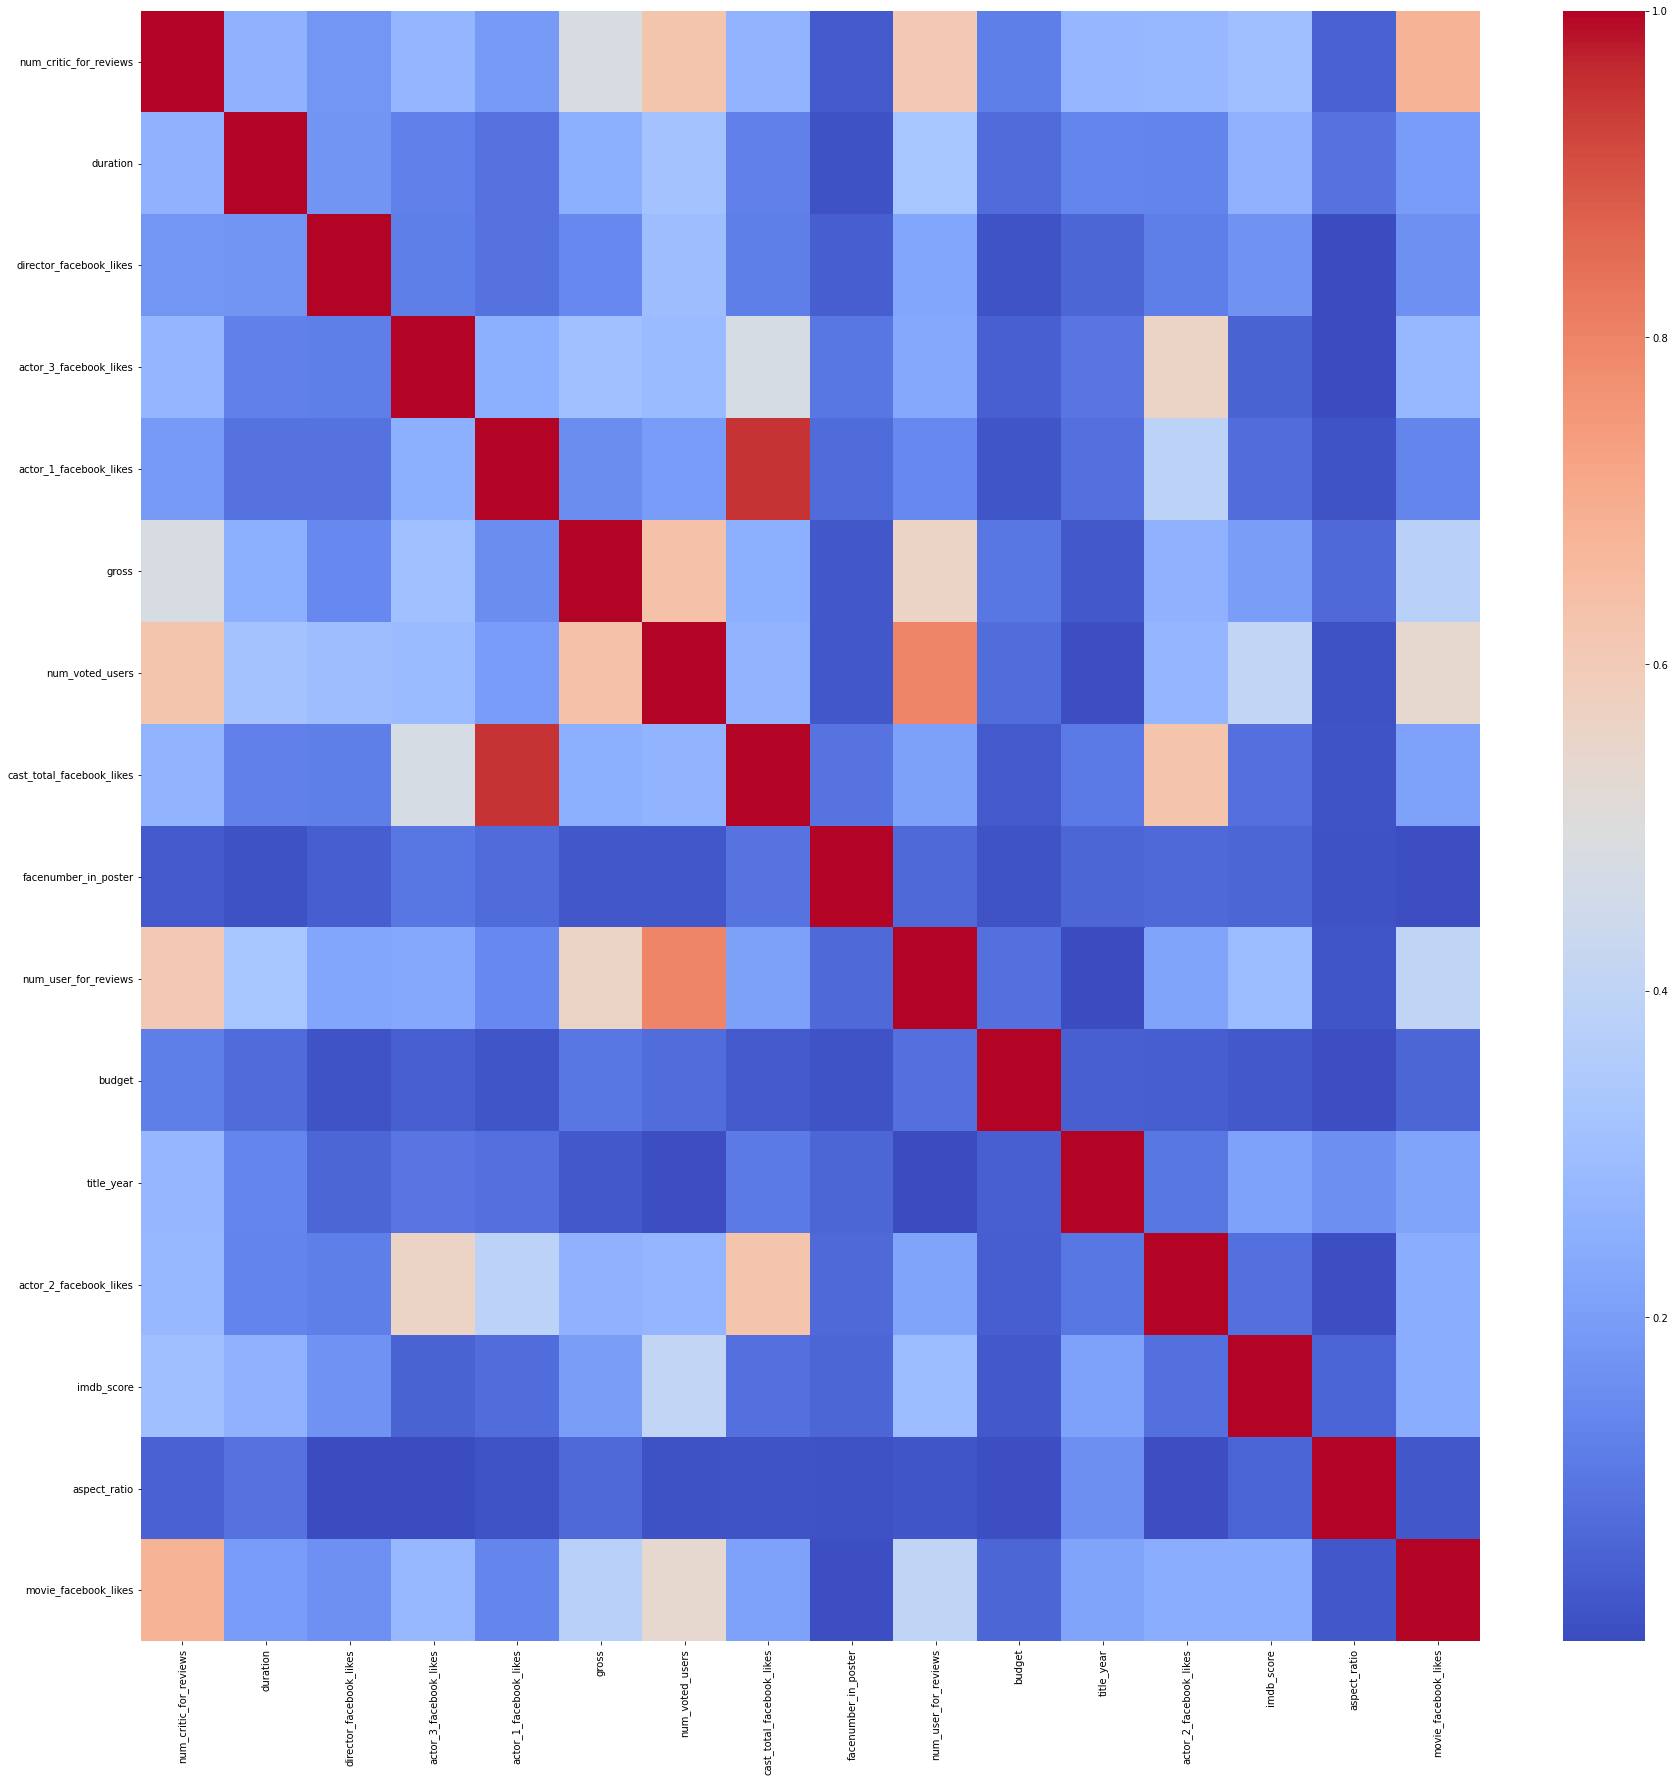

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , cmap='coolwarm')

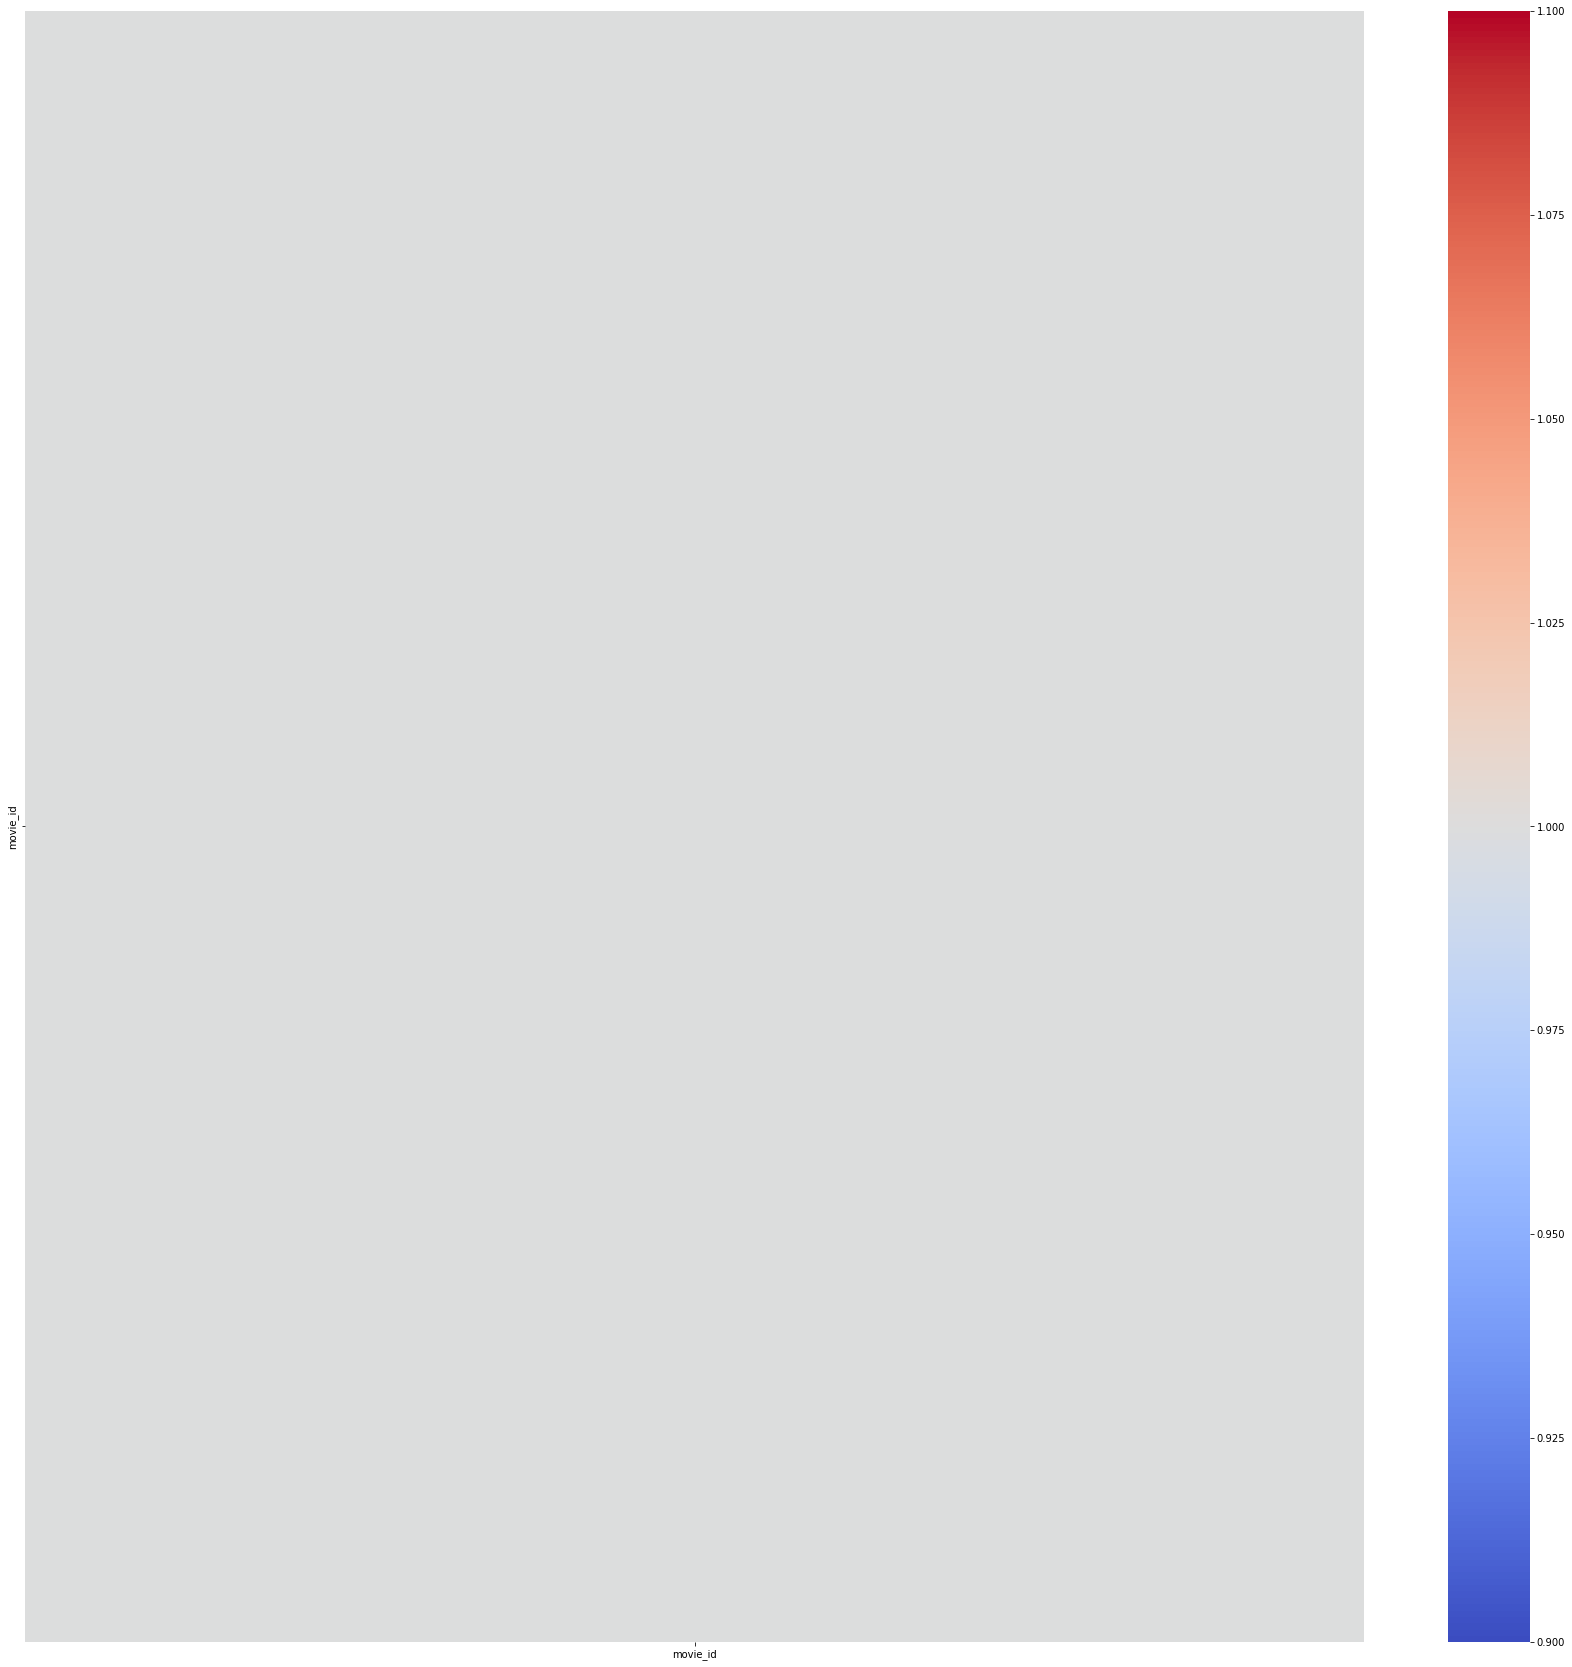

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix_credit , cmap='coolwarm')

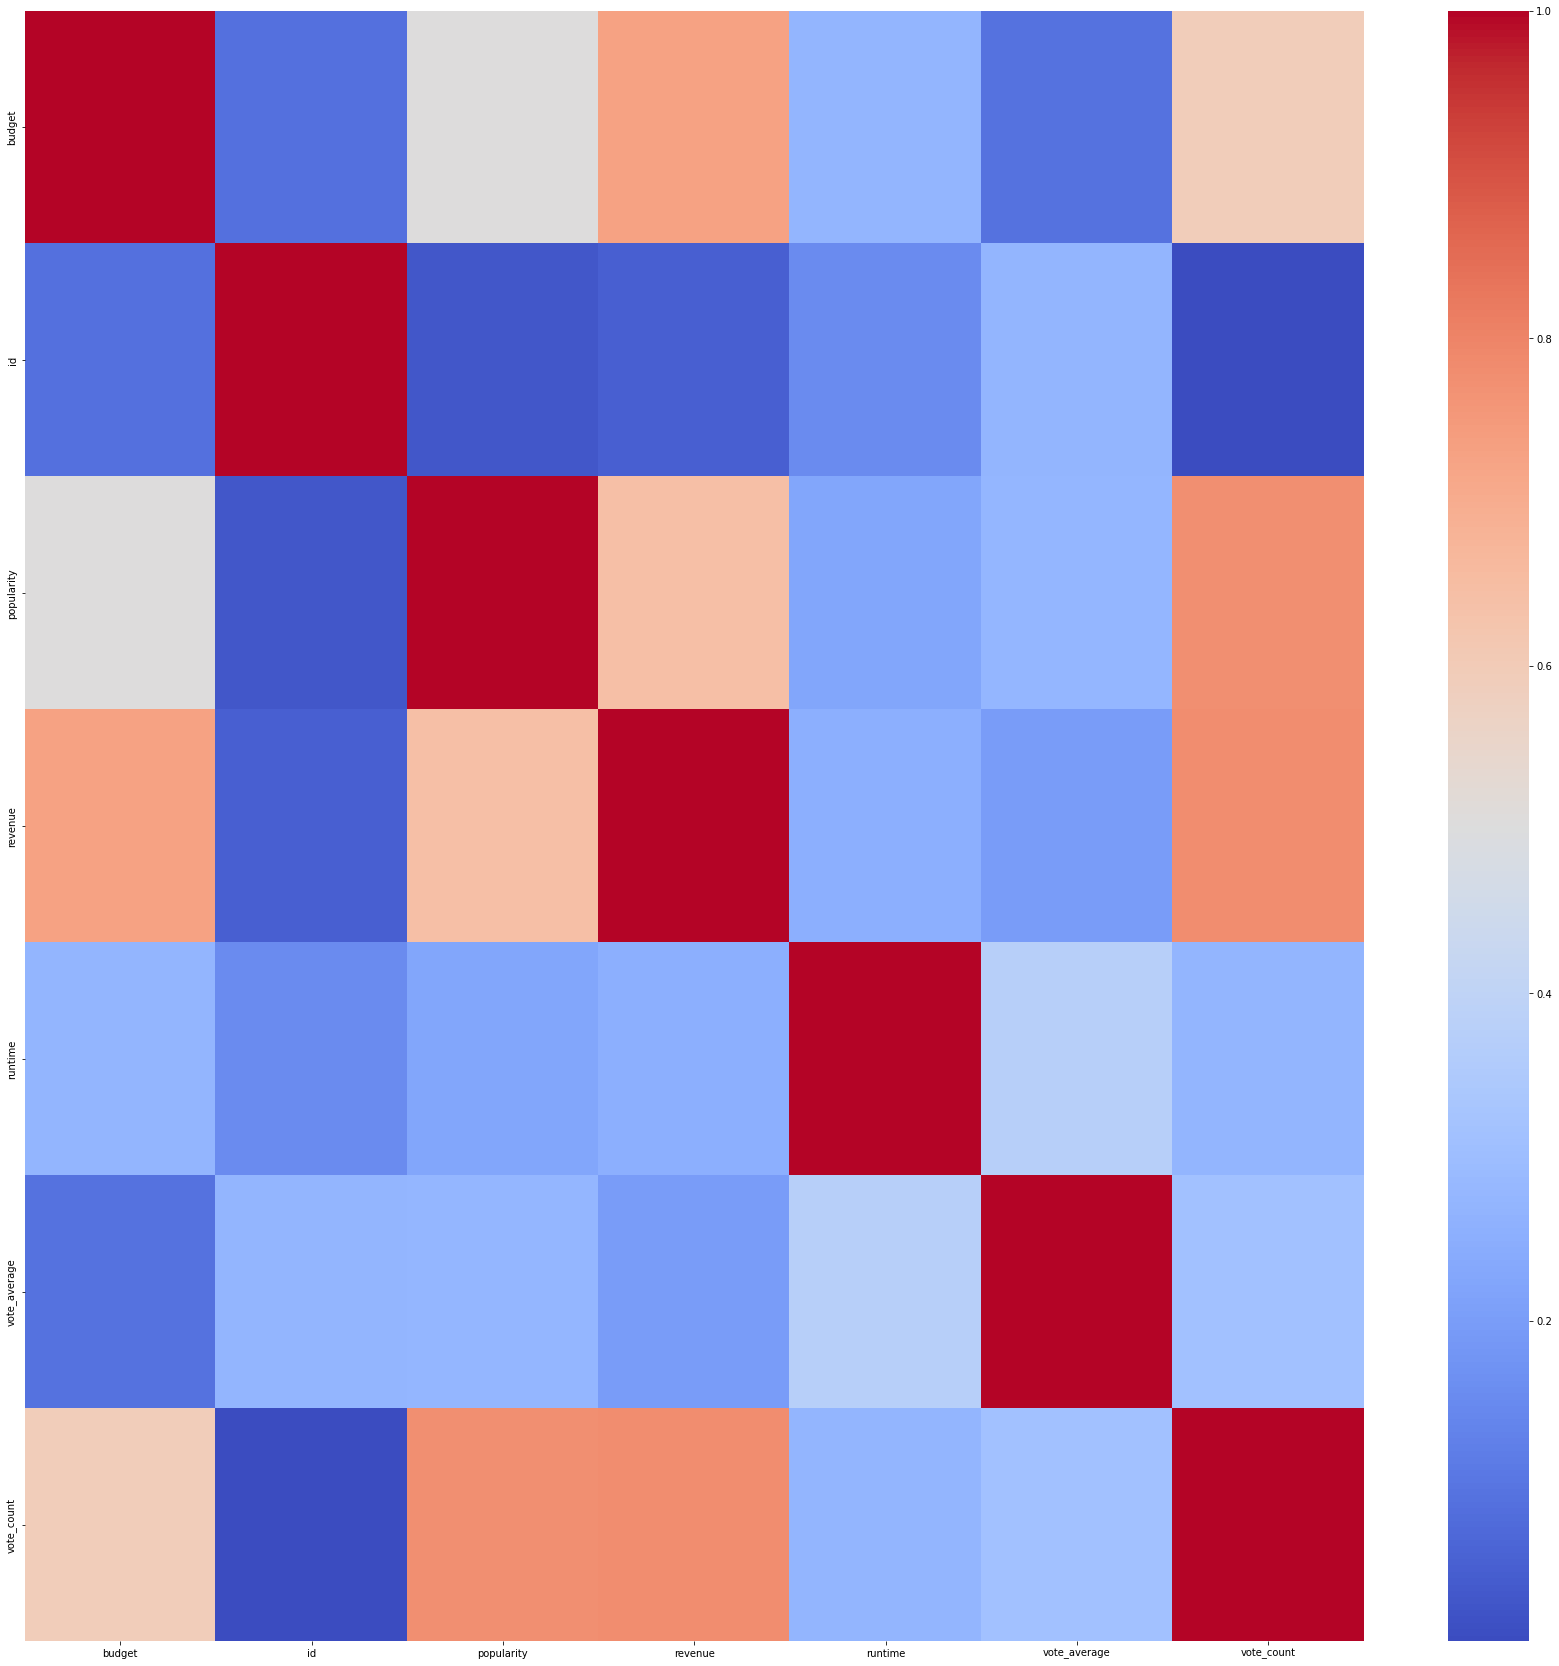

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix_movies , cmap='coolwarm')

Scatter

num_critic_for_reviews:
duration:
director_facebook_likes:
actor_3_facebook_likes:
actor_1_facebook_likes:


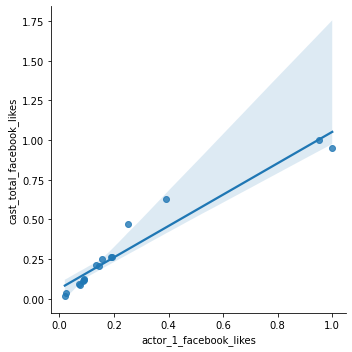

gross:
num_voted_users:


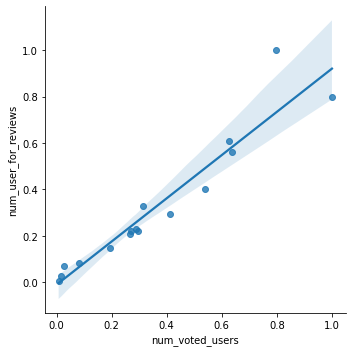

cast_total_facebook_likes:


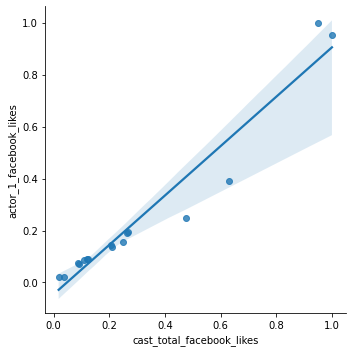

facenumber_in_poster:
num_user_for_reviews:


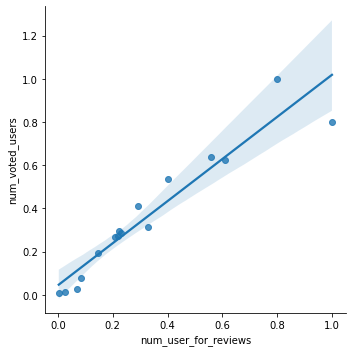

budget:
title_year:
actor_2_facebook_likes:
imdb_score:
aspect_ratio:
movie_facebook_likes:


In [ ]:
for row in corr_matrix.columns:
  print(f"{row}:")
  for col in corr_matrix.columns:
    if corr_matrix[f"{row}"][f"{col}"] >= 0.70 and corr_matrix[f"{row}"][f"{col}"]!= 1.0:
      # x_scatter = dissimilarity_matrix[f"{row}"]
      # y_scatter = dissimilarity_matrix[f"{col}"]
      sns.lmplot(x=f"{row}",y=f"{col}",data=corr_matrix)
      plt.show()

In [ ]:
for row in corr_matrix_credit.columns:
  print(f"{row}:")
  for col in corr_matrix_credit.columns:
    if corr_matrix_credit[f"{row}"][f"{col}"] >= 0.70 and corr_matrix_credit[f"{row}"][f"{col}"]!= 1.0:
      # x_scatter = dissimilarity_matrix[f"{row}"]
      # y_scatter = dissimilarity_matrix[f"{col}"]
      sns.lmplot(x=f"{row}",y=f"{col}",data=corr_matrix_credit)
      plt.show()

movie_id:


budget:


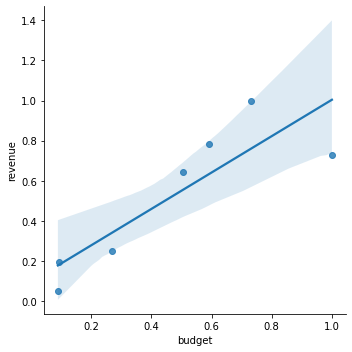

id:
popularity:


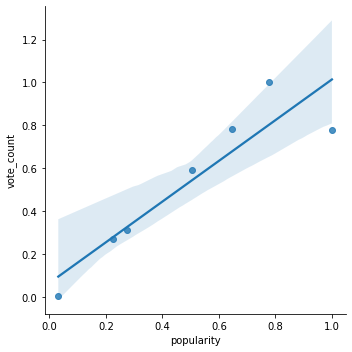

revenue:


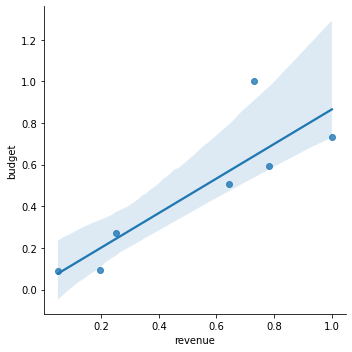

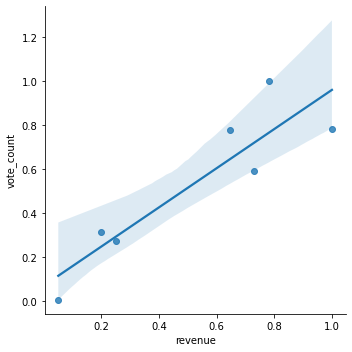

runtime:
vote_average:
vote_count:


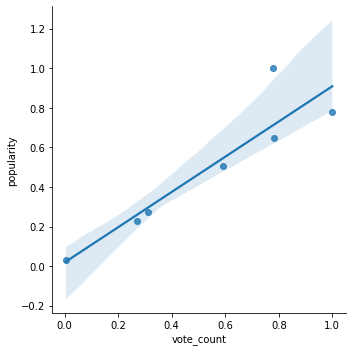

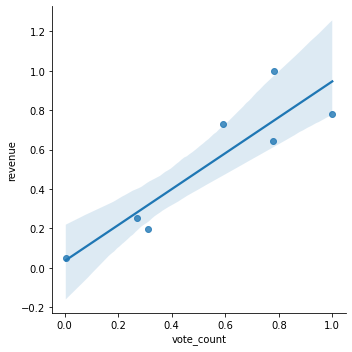

In [ ]:
for row in corr_matrix_movies.columns:
  print(f"{row}:")
  for col in corr_matrix_movies.columns:
    if corr_matrix_movies[f"{row}"][f"{col}"] >= 0.70 and corr_matrix_movies[f"{row}"][f"{col}"]!= 1.0:
      # x_scatter = dissimilarity_matrix[f"{row}"]
      # y_scatter = dissimilarity_matrix[f"{col}"]
      sns.lmplot(x=f"{row}",y=f"{col}",data=corr_matrix_movies)
      plt.show()

# **Upper triangle of correlations**

In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,NaN,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,0.049786,0.683176
duration,NaN,NaN,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,0.135038,0.131673,0.261662,0.090071,0.196605
director_facebook_likes,NaN,NaN,NaN,0.120199,0.090723,0.144945,0.297057,0.119549,0.041268,0.221890,0.021090,0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,NaN,NaN,NaN,NaN,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,0.003366,0.278844
actor_1_facebook_likes,NaN,NaN,NaN,NaN,NaN,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,0.020049,0.135348
gross,NaN,NaN,NaN,NaN,NaN,NaN,0.637271,0.247400,0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265911,0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,0.014761,0.537924
cast_total_facebook_likes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,0.017885,0.209786
facenumber_in_poster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069018,0.019559,0.061504,0.071228,0.062958,0.013713,0.008918
num_user_for_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084292,0.003147,0.219496,0.292475,0.024719,0.400594


In [ ]:
upper_credit = corr_matrix_credit.where(np.triu(np.ones(corr_matrix_credit.shape), k=1).astype(np.bool))
upper_credit.head()

,movie_id
movie_id,NaN


In [ ]:
upper_movies = corr_matrix_movies.where(np.triu(np.ones(corr_matrix_movies.shape), k=1).astype(np.bool))
upper_movies.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,NaN,0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,NaN,NaN,0.031202,0.050425,0.153536,0.270595,0.004128
popularity,NaN,NaN,NaN,0.644724,0.225502,0.273952,0.778130
revenue,NaN,NaN,NaN,NaN,0.251093,0.197150,0.781487
runtime,NaN,NaN,NaN,NaN,NaN,0.375046,0.271944


## Select columns with correlations above **threshold**

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 2 columns to remove.


In [ ]:
# Select columns with correlations above threshold
to_drop_credit = [column for column in upper_credit.columns if any(upper_credit[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop_credit)))

There are 0 columns to remove.


In [ ]:
to_drop_movies = [column for column in upper_movies.columns if any(upper_movies[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop_movies)))

There are 2 columns to remove.


# Drop Correlated **Variables**

In [ ]:
# Drop Correlated Variables
print('movieDataSet shape: ', movieDataSet.shape)
train = movieDataSet.drop(columns = to_drop)
print('Training shape: ', train.shape)

movieDataSet shape:  (5043, 28)
Training shape:  (5043, 26)


In [ ]:
print('credit shape: ', credit_DataFrame.shape)
train_credit = credit_DataFrame.drop(columns = to_drop_credit)
print('Training shape: ', train_credit.shape)

credit shape:  (4803, 4)
Training shape:  (4803, 4)


In [ ]:
print('movies shape: ', movies_DataFrame.shape)
train_movies = movies_DataFrame.drop(columns = to_drop_movies)
print('Training shape: ', train_movies.shape)

movies shape:  (4803, 20)
Training shape:  (4803, 18)


Remove Missing Values

A relatively simple choice of feature selection is removing missing values. Well, it seems simple, at least until we have to decide what percentage of missing values is the minimum threshold for removing a column. Like many choices in machine learning, there is no right answer, and not even a general rule of thumb for making this choice. In this implementation, if any columns have greater than 75% missing values, they will be removed.

Most models (including those in Sk-Learn) cannot handle missing values, so we will have to fill these in before machine learning. The Gradient Boosting Machine (at least in LightGBM) can handle missing values. Imputing missing values always makes me a little uncomfortable because we are adding information that actually isn't in the dataset. Since we are going to be evaluating several models (in a later notebook), we will have to use some form of imputation. For now, we will focus on removing columns above the threshold

In [ ]:
train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
train_missing.head()
print('Training set full shape: ', train.shape)

Training set full shape:  (5043, 26)


In [ ]:
train_missing_credit = (train_credit.isnull().sum() / len(train_credit)).sort_values(ascending = False)
train_missing_credit.head()
print('Training set full shape: ', train_missing_credit.shape)

Training set full shape:  (4,)


In [ ]:
train_missing_movies = (train_movies.isnull().sum() / len(train_movies)).sort_values(ascending = False)
train_missing_movies.head()
print('Training set full shape: ', train_missing_movies.shape)

Training set full shape:  (18,)


In [ ]:
# Identify missing values above threshold
train_missing = train_missing[train_missing > 0.75]

all_missing = list(set(train_missing))
print('There are %d columns with more than 75%% missing values' % len(all_missing))

There are 0 columns with more than 75% missing values


In [ ]:
train_missing_credit = train_missing_credit[train_missing_credit > 0.75]

all_missing_credit = list(set(train_missing_credit))
print('There are %d columns with more than 75%% missing values' % len(all_missing_credit))

There are 0 columns with more than 75% missing values


In [ ]:
train_missing_movies = train_missing_movies[train_missing_movies > 0.75]

all_missing_movies = list(set(train_missing_movies))
print('There are %d columns with more than 75%% missing values' % len(all_missing_movies))

There are 0 columns with more than 75% missing values


Let's drop the columns, one-hot encode the dataframes, and then align the columns of the dataframes

In [ ]:
print('Training set full shape: ', train.shape)
# train = pd.get_dummies(train.drop(columns = all_missing))
train = train.drop(columns = all_missing)
print('Training set full shape: ', train.shape)
train.head()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
train_number = train.select_dtypes(include='number')
print(train_number)
varModel.fit(train_number)

In [ ]:
constArr=varModel.get_support()
constArr

In [ ]:
#To find total number of constant and non constant features we will be using collections.Counter function.
import collections
collections.Counter(constArr)
#Non Constant feature:284
#Constant feature: 86

In [ ]:
#Print out constant feature name
constCol=[col for col in train_number.columns if col not in train_number.columns[constArr]]
constCol

In [ ]:
train_number.num_voted_users.value_counts

ویژگی های شبه ثابت آنهایی هستند که برای اکثر مشاهدات مجموعه داده یک مقدار را نشان می دهند. ما عمدتاً این ویژگی ها را در پیش بینی نتیجه در نظر نمی گیریم. برای شناسایی ویژگی های شبه ثابت، می توانیم از تابع VarianceThreshold از sklearn استفاده کنیم. ما از همان مجموعه آموزشی و مجموعه تست استفاده خواهیم کرد.

آستانه واریانس از sklearn یک رویکرد ساده پایه برای انتخاب ویژگی است. تمام ویژگی‌هایی را که واریانس آن‌ها آستانه‌ای را برآورده نمی‌کند، حذف می‌کند. به‌طور پیش‌فرض، تمام ویژگی‌های واریانس صفر، یعنی ویژگی‌هایی که در همه نمونه‌ها مقدار یکسانی دارند، حذف می‌کند.

In [ ]:
#Create variance threshold model
quasiModel=VarianceThreshold(threshold=0.01) #It will search for the features having 99% of same value in all samples.
quasiModel.fit(train_number)

VarianceThreshold(threshold=0.01)

In [ ]:
quasiArr=quasiModel.get_support()
quasiArr
#get_support() return True and False value for each feature.
#True: Not a quasi constant feature
#False: Quasi constant feature(It contains 99% same value in all samples.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

We can see there are 43 features/columns having quasi constant value. This mean they have 99% same value in all samples. Lets proof that, by selecting some of the quasi constant features and print out value counts.

In [ ]:
#Print out quasi constant feature name
quasiCols=[col for col in train_number.columns if col not in train_number.columns[quasiArr]]
quasiCols

We can see here more than 99% observation show one value 0. Therefore, there features are almost constant. Lets remove it from training set and test set.

In [ ]:
print('Shape before drop-->',train_number.shape)
train_number.drop(columns=quasiCols,axis=1,inplace=True)
print('Shape after drop-->',train_number.shape)

Duplicated Features

Often datasets contain one or more features that show the same values across all the observations. This means that both features are in essence identical. In addition, it is not unusual to introduce duplicated features after performing one hot encoding of categorical variables, particularly when using several highly cardinal variables.
Note: Finding duplicated features is a computationally costly operation in Python, therefore depending on the size of your dataset, you might not always be able to perform it.

In [ ]:
#The method will find the duplicate columns and return name of duplicated columns in an array
def duplicateColumns(data):
    dupliCols=[]
    for i in range(0,len(data.columns)):
        col1=data.columns[i]
        for col2 in data.columns[i+1:]:
            if data[col1].equals(data[col2]):
                dupliCols.append(col1+','+col2)
    return dupliCols

In [ ]:
duplCols=duplicateColumns(train_number)
duplCols

In [ ]:
print('Total Duplicated columns',len(duplCols))

In [ ]:
#Get the duplicate column names
dCols=[col.split(',')[1] for col in duplCols]
dCols

Remove the duplicat columns from training set and test set

In [ ]:
print('Shape of our data before applying filter technique-->',train_number.shape)
train_number=train_number.drop(columns=dCols,axis=1)
print('Shape after droping duplicate columns-->',train_number.shape)